## Create random graph with NetworkX

In [16]:
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def create_random_connected_graph(min_nodes=200, max_nodes=300):
    """Create a random connected graph with a random number of nodes and edges."""
    n_nodes = random.randint(min_nodes, max_nodes)
    G = nx.Graph()
    G.add_nodes_from(range(n_nodes))

    # Ensure the graph is connected: start with a random spanning tree
    nodes = list(G.nodes())
    random.shuffle(nodes)
    for i in range(1, n_nodes):
        G.add_edge(nodes[i], random.choice(nodes[:i]))

    # Add extra random edges
    max_possible_edges = n_nodes * (n_nodes - 1) // 2
    current_edges = G.number_of_edges()
    max_extra_edges = max_possible_edges - current_edges
    extra_edges = random.randint(0, min(max_extra_edges, n_nodes * 2))

    while extra_edges > 0:
        u, v = random.sample(range(n_nodes), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            extra_edges -= 1
    return G


G = create_random_connected_graph()

In [10]:
print(G.nodes)
print(G.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[(0, 3), (0, 18), (0, 9), (0, 15), (0, 1), (0, 8), (0, 7), (1, 17), (1, 8), (1, 11), (1, 16), (1, 10), (1, 4), (2, 3), (2, 11), (2, 17), (2, 7), (2, 10), (2, 16), (3, 15), (3, 6), (3, 7), (3, 4), (3, 13), (3, 5), (4, 6), (4, 8), (4, 12), (4, 17), (4, 14), (5, 10), (5, 16), (5, 18), (5, 8), (6, 9), (6, 14), (7, 12), (7, 18), (7, 14), (8, 13), (8, 16), (8, 17), (8, 18), (10, 17), (10, 15), (10, 18), (11, 12), (11, 14), (11, 13), (12, 17), (13, 15), (15, 18), (15, 17), (17, 18)]


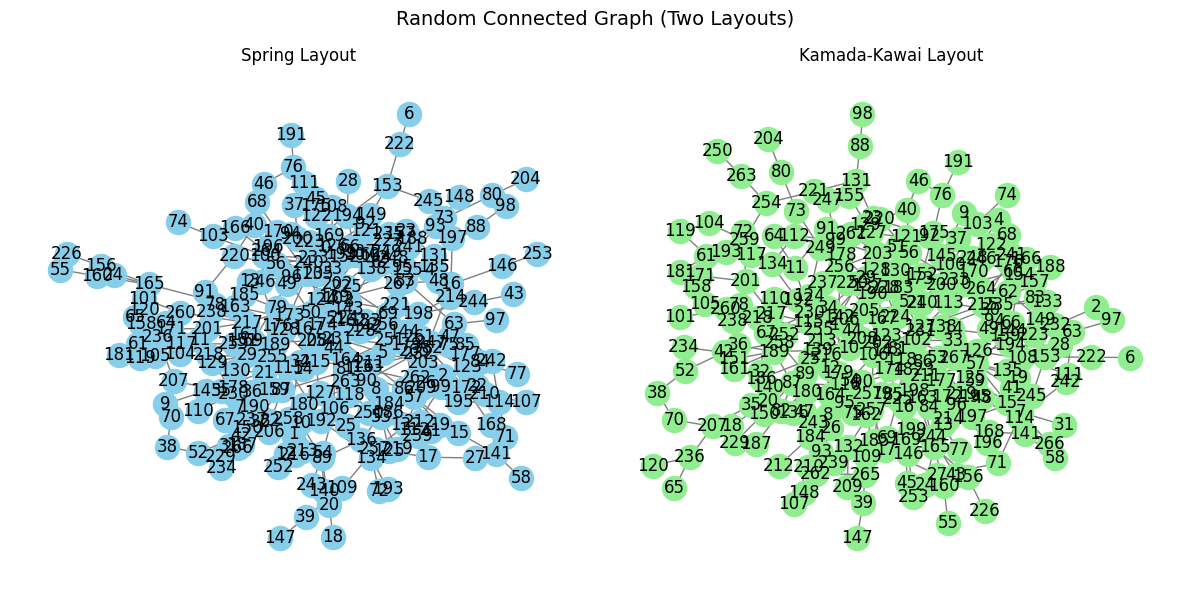

In [20]:

def plot_graph_with_two_layouts(G):
    """Plot the same graph using two different layout algorithms."""
    plt.figure(figsize=(12, 6))

    # First layout: Spring layout
    plt.subplot(1, 2, 1)
    pos1 = nx.spring_layout(G, seed=42)
    nx.draw_networkx(G, pos1, with_labels=True, node_size=300,
                     node_color='skyblue', edge_color='gray')
    plt.title("Spring Layout")
    plt.axis('off')

    # Second layout: Kamada-Kawai layout
    plt.subplot(1, 2, 2)
    pos2 = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G, pos2, with_labels=True, node_size=300,
                     node_color='lightgreen', edge_color='gray')
    plt.title("Kamada-Kawai Layout")
    plt.axis('off')

    plt.suptitle("Random Connected Graph (Two Layouts)", fontsize=14)
    plt.tight_layout()
    plt.show()


plot_graph_with_two_layouts(G)



## Compute topology metrics

In [21]:
degree_dict = dict(G.degree())
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
clustering = nx.clustering(G)


print("Node Metrics:")
for node in G.nodes():
    print(f"Node {node}: Degree={degree_dict[node]}, "
          f"Betweenness={betweenness[node]:.4f}, "
          f"Closeness={closeness[node]:.4f}, "
          f"Clustering Coefficient={clustering[node]:.4f}")

Node Metrics:
Node 0: Degree=5, Betweenness=0.0539, Closeness=0.1982, Clustering Coefficient=0.0000
Node 1: Degree=4, Betweenness=0.0314, Closeness=0.1957, Clustering Coefficient=0.0000
Node 2: Degree=1, Betweenness=0.0000, Closeness=0.1386, Clustering Coefficient=0.0000
Node 3: Degree=5, Betweenness=0.0838, Closeness=0.2296, Clustering Coefficient=0.0000
Node 4: Degree=1, Betweenness=0.0000, Closeness=0.1499, Clustering Coefficient=0.0000
Node 5: Degree=2, Betweenness=0.0204, Closeness=0.2041, Clustering Coefficient=0.0000
Node 6: Degree=1, Betweenness=0.0000, Closeness=0.1255, Clustering Coefficient=0.0000
Node 7: Degree=3, Betweenness=0.0150, Closeness=0.1571, Clustering Coefficient=0.0000
Node 8: Degree=1, Betweenness=0.0000, Closeness=0.1816, Clustering Coefficient=0.0000
Node 9: Degree=1, Betweenness=0.0000, Closeness=0.1447, Clustering Coefficient=0.0000
Node 10: Degree=8, Betweenness=0.1258, Closeness=0.2263, Clustering Coefficient=0.0000
Node 11: Degree=4, Betweenness=0.0408, 

Graph has 268 nodes and 339 edges.
Average degree: 2.53
Average clustering coefficient: 0.01
Diameter (approx): 13


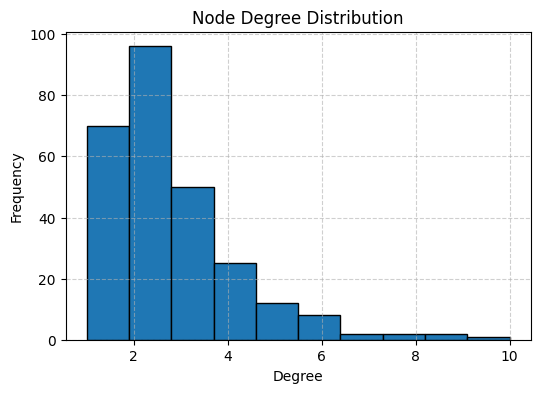

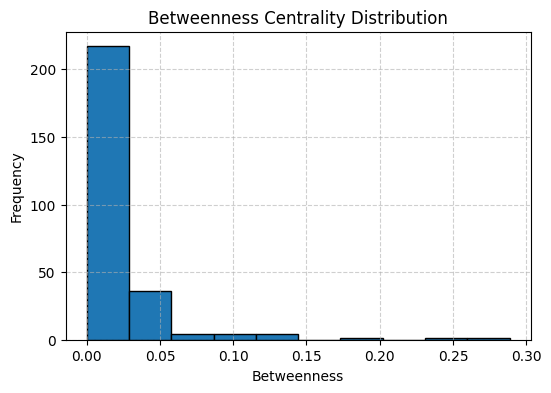

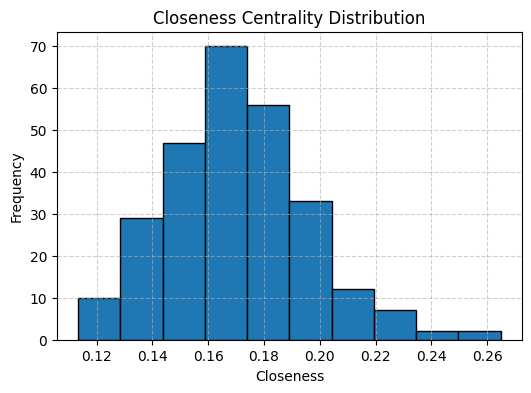

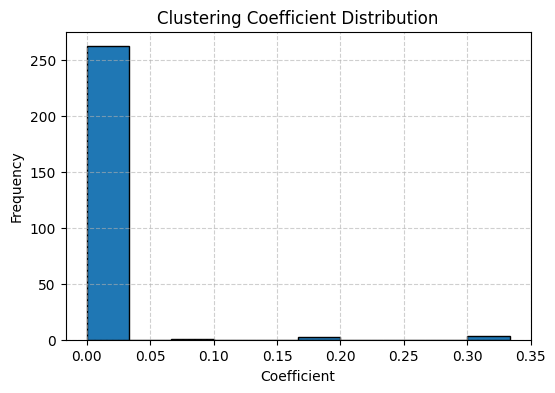

In [22]:
def plot_metric_distribution(metric_dict, title, xlabel):
    """Helper to plot distributions of node metrics."""
    plt.figure(figsize=(6,4))
    plt.hist(metric_dict.values(), bins=10, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def analyze_graph(G):
    """Compute and plot relevant graph metrics."""
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    clustering = nx.clustering(G)

    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    print(f"Average degree: {sum(degree_dict.values()) / G.number_of_nodes():.2f}")
    print(f"Average clustering coefficient: {nx.average_clustering(G):.2f}")
    print(f"Diameter (approx): {nx.diameter(G) if nx.is_connected(G) else 'Graph not connected'}")

    # Plot distributions
    plot_metric_distribution(degree_dict, "Node Degree Distribution", "Degree")
    plot_metric_distribution(betweenness, "Betweenness Centrality Distribution", "Betweenness")
    plot_metric_distribution(closeness, "Closeness Centrality Distribution", "Closeness")
    plot_metric_distribution(clustering, "Clustering Coefficient Distribution", "Coefficient")


analyze_graph(G)
